In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import DataLoader, TensorDataset

In [2]:
plt.style.use("ggplot")

iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [3]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
df['target'] = iris.target
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int32  
dtypes: float64(4), int32(1)
memory usage: 5.4 KB


In [8]:
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
df['species'] = df['target'].map({0:'setosa', 1:'versicolor', 2:'virginica'})
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [10]:
df_mean = df.groupby('species').mean()
df_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
species,,,,,
setosa,5.006,3.428,1.462,0.246,0.0
versicolor,5.936,2.770,4.260,1.326,1.0
virginica,6.588,2.974,5.552,2.026,2.0


In [11]:
df_mean.pop("target")
df_mean

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


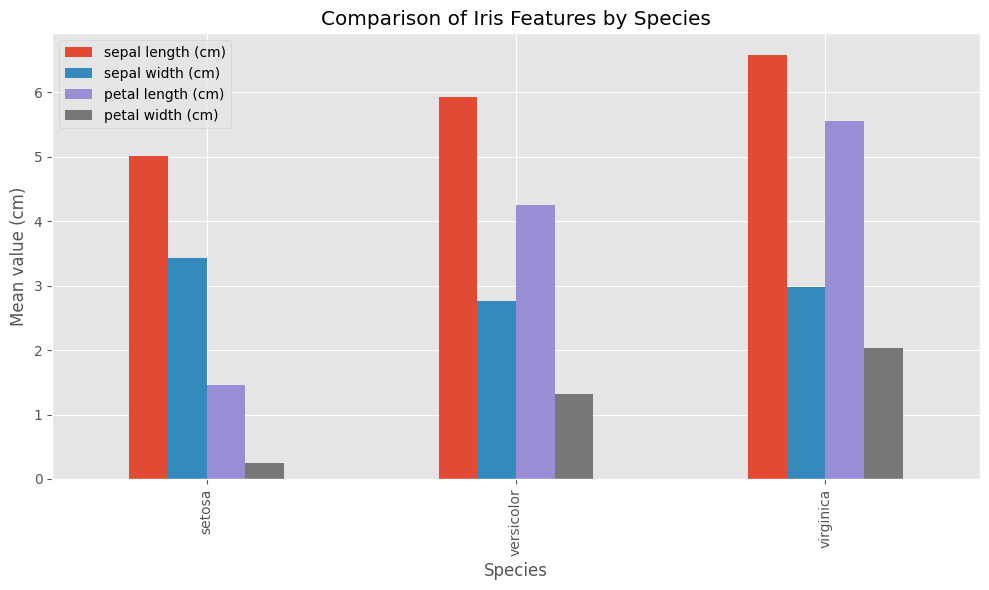

In [12]:
df_mean.plot(kind='bar', figsize=(10,6))

plt.title('Comparison of Iris Features by Species')

plt.ylabel('Mean value (cm)')

plt.xlabel('Species')

plt.tight_layout()

plt.show()

In [13]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'species'],
      dtype='object')

In [14]:
df.columns[: -2]

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [15]:
features = df.columns[: -2]
features

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [16]:
df.loc[:, "species"]

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [17]:
df.loc[:, "species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [18]:
df.loc[:, "species"].unique().tolist()

['setosa', 'versicolor', 'virginica']

In [19]:
species_list = df.loc[:, "species"].unique().tolist()
species_list

['setosa', 'versicolor', 'virginica']

In [20]:
colors = ['steelblue', 'darkorange', 'forestgreen']
colors

['steelblue', 'darkorange', 'forestgreen']

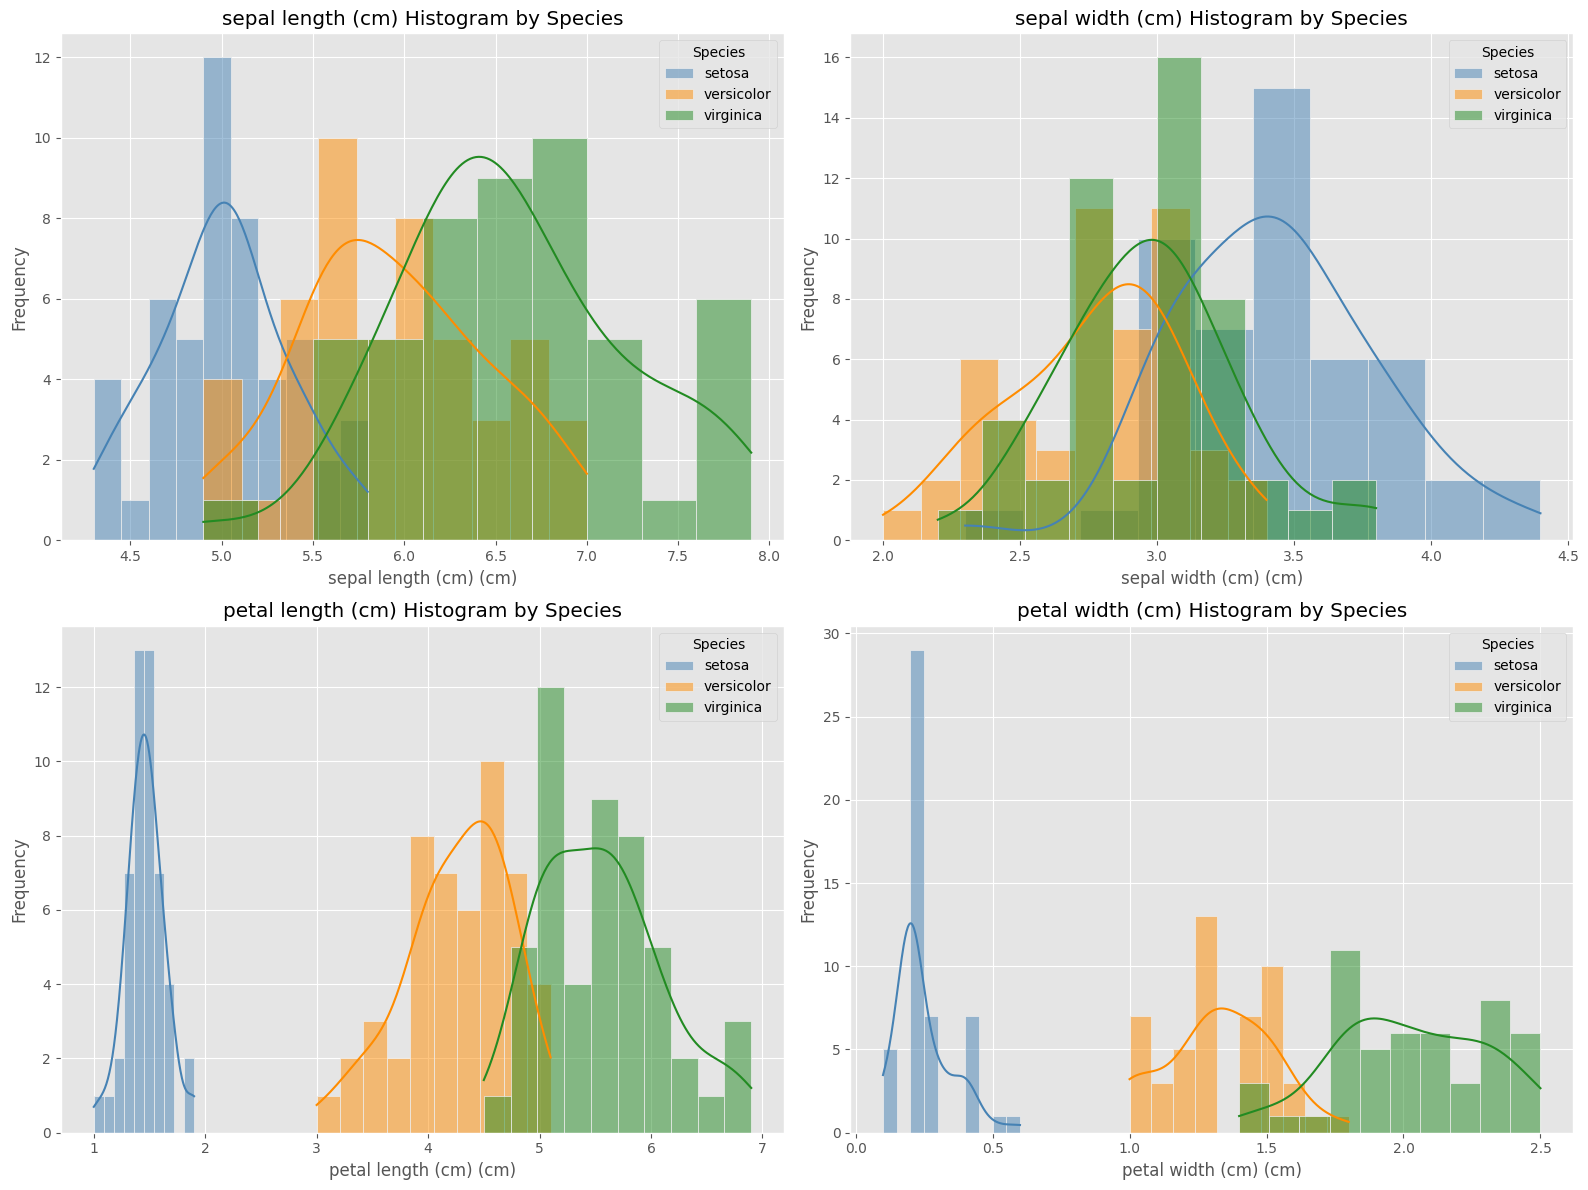

In [21]:
plt.figure(figsize=(16, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)

    for sp, color in zip(species_list, colors):
        sp_df = df[df['species'] == sp]

        sns.histplot(
        sp_df[feature],
        bins=10,
        kde=True,
        color=color,
        label=sp,
        alpha=0.5
        )

    plt.title(f'{feature} Histogram by Species')

    plt.xlabel(f'{feature} (cm)')

    plt.ylabel('Frequency')

    plt.legend(title='Species')

plt.tight_layout()

plt.show()

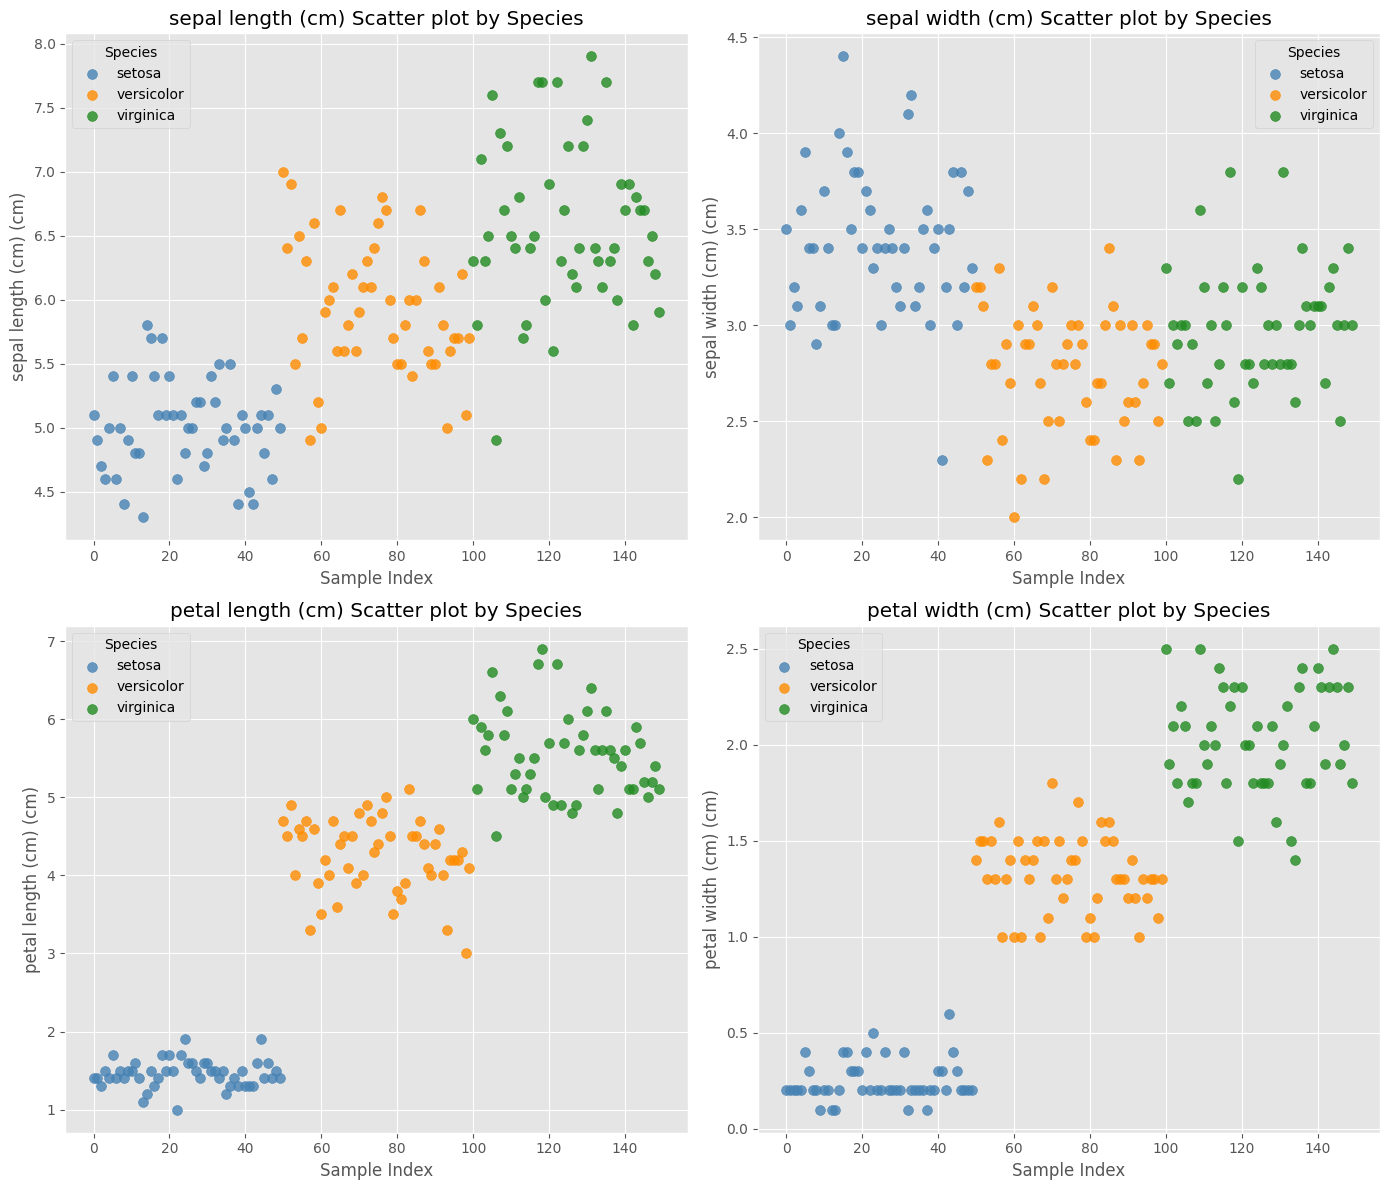

In [22]:
plt.figure(figsize=(14, 12))

for idx, feature in enumerate(features):
    plt.subplot(2, 2, idx+1)

    for sp, color in zip(species_list, colors):
        sp_df = df[df['species'] == sp]

        plt.scatter(sp_df.index, sp_df[feature], label=sp, color=color, alpha=0.8, s=50)

    plt.title(f'{feature} Scatter plot by Species')

    plt.xlabel('Sample Index')

    plt.ylabel(f'{feature} (cm)')

    plt.legend(title='Species')

plt.tight_layout()

plt.show()

In [23]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,species
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [24]:
X = df.iloc[:, :-2]
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [25]:
X_mean = X.mean()
X_mean

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64

In [26]:
X_std = X.std()
X_std

sepal length (cm)    0.828066
sepal width (cm)     0.435866
petal length (cm)    1.765298
petal width (cm)     0.762238
dtype: float64

In [27]:
X_norm = (X - X_mean) / X_std
X_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052
...,...,...,...,...
145,1.034539,-0.131539,0.816859,1.443994
146,0.551486,-1.278680,0.703564,0.919223
147,0.793012,-0.131539,0.816859,1.050416
148,0.430722,0.786174,0.930154,1.443994


In [28]:
y = df["target"]
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int32

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, test_size=0.2, random_state=42)

In [30]:
X_train

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
22,-1.501490,1.245030,-1.562342,-1.311052
15,-0.173094,3.080455,-1.279104,-1.048667
65,1.034539,0.097889,0.363678,0.263260
11,-1.259964,0.786174,-1.222456,-1.311052
42,-1.743017,0.327318,-1.392399,-1.311052
...,...,...,...,...
71,0.309959,-0.590395,0.137087,0.132067
106,-1.139200,-1.278680,0.420326,0.656838
14,-0.052331,2.162743,-1.449047,-1.311052
92,-0.052331,-1.049251,0.137087,0.000875


In [31]:
y_train

22     0
15     0
65     1
11     0
42     0
      ..
71     1
106    2
14     0
92     1
102    2
Name: target, Length: 120, dtype: int32

In [32]:
X_test

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
73,0.309959,-0.590395,0.533621,0.000875
18,-0.173094,1.703886,-1.165809,-1.179859
118,2.242172,-1.049251,1.779869,1.443994
78,0.189196,-0.360967,0.420326,0.394453
76,1.155302,-0.590395,0.590269,0.263260
31,-0.535384,0.786174,-1.279104,-1.048667
64,-0.293857,-0.360967,-0.089503,0.132067
141,1.276066,0.097889,0.760211,1.443994
68,0.430722,-1.966964,0.420326,0.394453
82,-0.052331,-0.819823,0.080440,0.000875


In [33]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
Name: target, dtype: int32

In [34]:
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)

In [35]:
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)

In [36]:
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)

In [37]:
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [38]:
batch_size = 32

In [39]:
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)

In [40]:
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)

In [41]:
model = nn.Sequential(
    nn.Linear(4, 20),
    nn.BatchNorm1d(20),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(20, 10),
    nn.BatchNorm1d(10),
    nn.ReLU(),
    nn.Dropout(0.5),

    nn.Linear(10, 3)
)

In [42]:
model

Sequential(
  (0): Linear(in_features=4, out_features=20, bias=True)
  (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=10, out_features=3, bias=True)
)

In [43]:
def init_weights(layer):
    if isinstance(layer, nn.Linear):

        if layer.out_features == 3:
            nn.init.xavier_uniform_(layer.weight)
        else:
            nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')

        nn.init.zeros_(layer.bias)

In [44]:
model.apply(init_weights)

Sequential(
  (0): Linear(in_features=4, out_features=20, bias=True)
  (1): BatchNorm1d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU()
  (3): Dropout(p=0.5, inplace=False)
  (4): Linear(in_features=20, out_features=10, bias=True)
  (5): BatchNorm1d(10, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (6): ReLU()
  (7): Dropout(p=0.5, inplace=False)
  (8): Linear(in_features=10, out_features=3, bias=True)
)

In [45]:
criterion = nn.CrossEntropyLoss()

In [46]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
epochs = 1000

for epoch in range(epochs):
    total_loss =  0

    for batch_x, batch_y in train_loader:
        optimizer.zero_grad()
        outputs = model(batch_x)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    if (epoch+1) % 10 == 0:
        avg_loss = total_loss / len(train_loader)
        print(f'Epoch [{epoch+1}/{epochs}], 평균 손실: {avg_loss:.4f}')

Epoch [10/1000], 평균 손실: 1.0903
Epoch [20/1000], 평균 손실: 0.8778
Epoch [30/1000], 평균 손실: 0.8587
Epoch [40/1000], 평균 손실: 0.7823
Epoch [50/1000], 평균 손실: 0.8033
Epoch [60/1000], 평균 손실: 0.7157
Epoch [70/1000], 평균 손실: 0.7259
Epoch [80/1000], 평균 손실: 0.7757
Epoch [90/1000], 평균 손실: 0.6305
Epoch [100/1000], 평균 손실: 0.6414
Epoch [110/1000], 평균 손실: 0.6070
Epoch [120/1000], 평균 손실: 0.5766
Epoch [130/1000], 평균 손실: 0.5169
Epoch [140/1000], 평균 손실: 0.5418
Epoch [150/1000], 평균 손실: 0.5444
Epoch [160/1000], 평균 손실: 0.5422
Epoch [170/1000], 평균 손실: 0.5951
Epoch [180/1000], 평균 손실: 0.4675
Epoch [190/1000], 평균 손실: 0.4672
Epoch [200/1000], 평균 손실: 0.4810
Epoch [210/1000], 평균 손실: 0.4659
Epoch [220/1000], 평균 손실: 0.3903
Epoch [230/1000], 평균 손실: 0.4733
Epoch [240/1000], 평균 손실: 0.4913
Epoch [250/1000], 평균 손실: 0.4194
Epoch [260/1000], 평균 손실: 0.3591
Epoch [270/1000], 평균 손실: 0.3936
Epoch [280/1000], 평균 손실: 0.3981
Epoch [290/1000], 평균 손실: 0.4319
Epoch [300/1000], 평균 손실: 0.3543
Epoch [310/1000], 평균 손실: 0.4707
Epoch [320/1000],

In [48]:
model.eval()

with torch.no_grad():
    test_outputs = model(X_test_tensor)
    predicted = torch.argmax(test_outputs, dim=1)
    accuracy = (predicted == y_test_tensor).float().mean()
    print(f'\n테스틑 정확도: {accuracy.item()*100:.2f}%')


테스틑 정확도: 96.67%


In [49]:
new_iris_data = [[5.8, 2.8, 5.1, 2.4]]
new_iris_data

[[5.8, 2.8, 5.1, 2.4]]

In [50]:
X.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'],
      dtype='object')

In [51]:
new_iris_df = pd.DataFrame(new_iris_data, columns=X.columns)
new_iris_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.8,2.8,5.1,2.4


In [52]:
new_iris_norm = (new_iris_df - X_mean) / X_std
new_iris_norm

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.052331,-0.590395,0.760211,1.575187


In [53]:
new_iris_tensor = torch.tensor(new_iris_norm.values, dtype=torch.float32)
new_iris_tensor

tensor([[-0.0523, -0.5904,  0.7602,  1.5752]])

In [54]:
model.eval()

with torch.no_grad():
    output = model(new_iris_tensor)
    print(f"output={output}")
    
    predicted_class = torch.argmax(output, dim=1).item()
    print(f"predicted_class={predicted_class}")

    class_labels = ['setosa', 'versicolor', 'virginica']
    predicted_species = class_labels[predicted_class]
    print(f"\n새로운 붓꽃 데이터의 예측 품종: {predicted_species}")

output=tensor([[-14.6899,  -3.1731,   2.2746]])
predicted_class=2

새로운 붓꽃 데이터의 예측 품종: virginica
